# Plotting

We take a look at built-in plotting functions. 

A typical simulation requires visualizing:

1. geometry
2. simulation results
3. space-dependent arrays (such as eigenstates, charges, ...)

All public plotting functions are associated with a list of orbitals.

## Geometry

Geometries can be visualized in 2D or 3D.

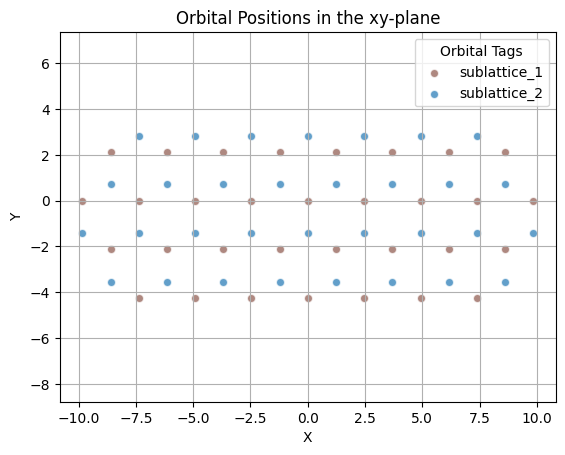

In [1]:
from granad import MaterialCatalog, Rectangle

flake = MaterialCatalog.get("graphene").cut_flake( Rectangle(10, 10) )
flake.show_2d()

If we have a stack

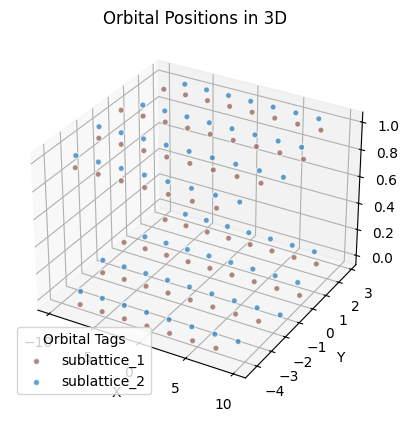

In [2]:
flake_shifted = MaterialCatalog.get("graphene").cut_flake( Rectangle(10, 10) )
flake_shifted.shift_by_vector( [0,0,1] )
stack = flake + flake_shifted
stack.show_3d()

## Simulation output

There is a dedicated function for showing TD simulation results. Let's illustrate this by tracking the current

RHS compiled
RHS compiled


100.0 %


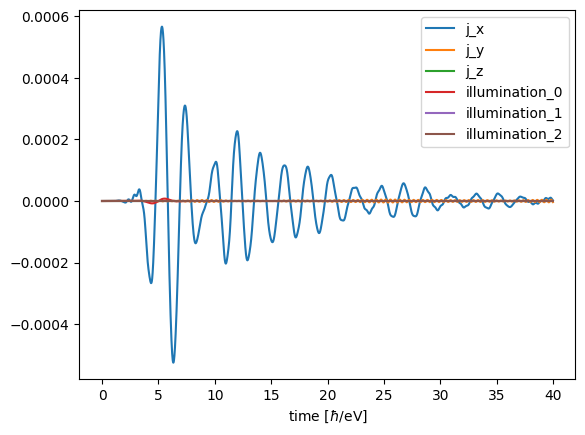

In [3]:
from granad import Pulse
pulse = Pulse(
    amplitudes=[1e-5, 0, 0], frequency=2.3, peak=5, fwhm=2
)
result = flake.master_equation(
    illumination=pulse,
    expectation_values = [flake.velocity_operator],
    end_time=40,
    relaxation_rate=1/10,
    grid=100,
)
plot_labels = ['j_x', 'j_y', 'j_z'] 
flake.show_res( result, plot_labels = plot_labels )

We can also plot in frequency domain by specifying the omega limits

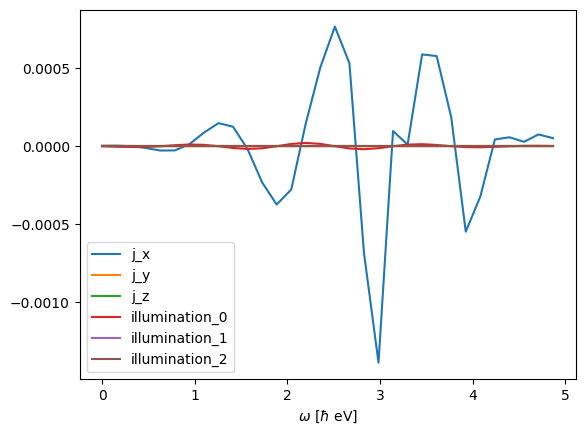

In [4]:
flake.show_res( result, omega_max = 5, omega_min = 0, plot_labels = plot_labels )

## Space-dependent arrays

The functions show_2d and show_3d are a bit more versatile than initially indicated.

If we supply a "display" argument, we can plot an arbitrary array on the grid spanned by the orbitals and filter it by orbital tags. Let's demonstrate this by visualizing the lowest energy one particle state of the flake

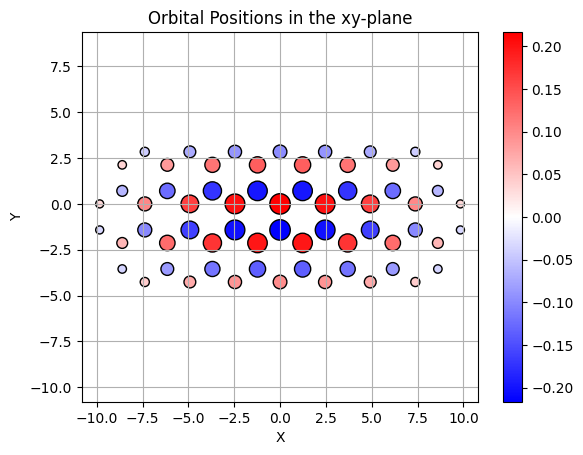

In [5]:
flake.show_2d( display = flake.eigenvectors[:, 0] )

If you want a normalized plot of the absolute values, do

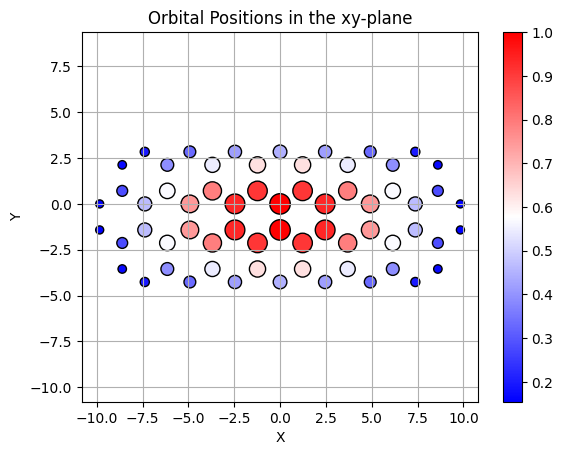

In [6]:
flake.show_2d( display = flake.eigenvectors[:, 0], scale = True )

Additionally, if you supply the keyword argument name = "MY-PLOT-NAME.pdf" to any plotting function, the plot will not be displayed, but instead saved to disk in the directory you invoked Python.